# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.9 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")^^
```

In [3]:
# env = UnityEnvironment(file_name="Tennis.exe")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
test_rewards =[2,1]
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        # print("1-actions.shape, action", actions.shape,  actions)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 17
        # print("2-actions.shape, action", actions.shape,  actions)
        
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        # print("rewards", rewards)
        # print("shape of rewards", np.shape(rewards))
        # test_rewards.append(rewards)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        if (np.max(rewards) > 0):
            print("--Treffer-")
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    # print ("test_rewards", test_rewards)
    print('Score (max over agents) from episode {}: Score: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: Score: 0.0
Score (max over agents) from episode 2: Score: 0.0
Score (max over agents) from episode 3: Score: 0.0
Score (max over agents) from episode 4: Score: 0.0
Score (max over agents) from episode 5: Score: 0.0


When finished, you can close the environment.

In [7]:
# env.close()

###  4. Implementation of the MADDPG-Algorithm



In [8]:
import numpy as np
import gym
import random
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from collections import deque

In [9]:
from model import Actor, Critic
from maddpg_agent import Agent, ReplayBuffer
import numpy as np 
import random 
import copy 
from collections import namedtuple, deque
import torch

BUFFER_SIZE = int(1e7)  # replay buffer size
BATCH_SIZE = 128        # minibatch size


In [10]:
agent_player_1 = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=24)
agent_player_2 = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=24)

Episode: 10	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 0.000
--Ball returned at episode: 12,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 13,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 16,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
Episode: 20	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 0.015
Episode: 30	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 0.010
Episode: 40	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 0.007
Episode: 50	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 0.006
Episode: 60	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 0.005
Episode: 70	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 0.004
Episode: 80	score_actual Episode: 0.000	Average Scor

--Ball returned at episode: 394,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 396,	timesteps: 15,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 398,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 399,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
Episode: 400	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 0.032
--Ball returned at episode: 403,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
Episode: 410	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 0.029
--Ball returned at episode: 412,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 414,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 419,	timesteps: 17,	sum of episode-score 

--Ball returned at episode: 568,	timesteps: 53,	sum of episode-score for Player_1/Player_2: [0.100][0.200]
--Ball returned at episode: 569,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
Episode: 570	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 0.028
--Ball returned at episode: 572,	timesteps: 15,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 574,	timesteps: 15,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 576,	timesteps: 15,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 576,	timesteps: 45,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 577,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
Episode: 580	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 0.031
--Ball returned at episode: 583,	timesteps: 15,	sum of episode-score 

--Ball returned at episode: 818,	timesteps: 19,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
Episode: 820	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 0.020
Episode: 830	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 0.019
--Ball returned at episode: 831,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 833,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
Episode: 840	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 0.019
--Ball returned at episode: 844,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 847,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 848,	timesteps: 19,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
Episode: 850	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 

--Ball returned at episode: 967,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 967,	timesteps: 39,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 968,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 968,	timesteps: 38,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 968,	timesteps: 57,	sum of episode-score for Player_1/Player_2: [0.200][0.100]
--Ball returned at episode: 969,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
Episode: 970	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 0.041
--Ball returned at episode: 972,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 974,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 974,	timesteps: 39,	sum o

--Ball returned at episode: 1034,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1035,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1036,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1037,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1038,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1039,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1040,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1040,	timesteps: 39,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
Episode: 1040	score_actual Episode: 0.100	Average Score of the last hundred Episodes: 0.074
--Ball returned at episode: 1041,	timesteps:

--Ball returned at episode: 1089,	timesteps: 93,	sum of episode-score for Player_1/Player_2: [0.300][0.200]
--Ball returned at episode: 1089,	timesteps: 115,	sum of episode-score for Player_1/Player_2: [0.300][0.300]
--Ball returned at episode: 1089,	timesteps: 131,	sum of episode-score for Player_1/Player_2: [0.400][0.300]
--Ball returned at episode: 1089,	timesteps: 153,	sum of episode-score for Player_1/Player_2: [0.400][0.400]
--Ball returned at episode: 1089,	timesteps: 169,	sum of episode-score for Player_1/Player_2: [0.500][0.400]
--Ball returned at episode: 1089,	timesteps: 191,	sum of episode-score for Player_1/Player_2: [0.500][0.500]
--Ball returned at episode: 1089,	timesteps: 207,	sum of episode-score for Player_1/Player_2: [0.600][0.500]
--Ball returned at episode: 1089,	timesteps: 229,	sum of episode-score for Player_1/Player_2: [0.600][0.600]
--Ball returned at episode: 1089,	timesteps: 245,	sum of episode-score for Player_1/Player_2: [0.700][0.600]
--Ball returned at e

--Ball returned at episode: 1124,	timesteps: 48,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1124,	timesteps: 63,	sum of episode-score for Player_1/Player_2: [0.200][0.100]
--Ball returned at episode: 1124,	timesteps: 93,	sum of episode-score for Player_1/Player_2: [0.200][0.200]
--Ball returned at episode: 1124,	timesteps: 107,	sum of episode-score for Player_1/Player_2: [0.300][0.200]
--Ball returned at episode: 1125,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1127,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1127,	timesteps: 54,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1129,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
Episode: 1130	score_actual Episode: 0.000	Average Score of the last hundred Episodes: 0.113
--Ball returned at episode: 1132,	timesteps

--Ball returned at episode: 1235,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1236,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1237,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1238,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1239,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1240,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
Episode: 1240	score_actual Episode: 0.100	Average Score of the last hundred Episodes: 0.059
--Ball returned at episode: 1241,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1242,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1243,	timesteps:

--Ball returned at episode: 1296,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1296,	timesteps: 38,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1298,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1299,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1300,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
Episode: 1300	score_actual Episode: 0.100	Average Score of the last hundred Episodes: 0.086
--Ball returned at episode: 1301,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1301,	timesteps: 38,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1304,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1306,	timesteps:

--Ball returned at episode: 1342,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1343,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1343,	timesteps: 46,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1343,	timesteps: 52,	sum of episode-score for Player_1/Player_2: [0.100][0.200]
--Ball returned at episode: 1344,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1345,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1346,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1347,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1348,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 

--Ball returned at episode: 1398,	timesteps: 127,	sum of episode-score for Player_1/Player_2: [0.300][0.300]
--Ball returned at episode: 1398,	timesteps: 139,	sum of episode-score for Player_1/Player_2: [0.400][0.300]
--Ball returned at episode: 1399,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1399,	timesteps: 50,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1399,	timesteps: 63,	sum of episode-score for Player_1/Player_2: [0.200][0.100]
--Ball returned at episode: 1400,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
Episode: 1400	score_actual Episode: 0.090	Average Score of the last hundred Episodes: 0.114
--Ball returned at episode: 1401,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1402,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1402,	timestep

--Ball returned at episode: 1440,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
Episode: 1440	score_actual Episode: 0.100	Average Score of the last hundred Episodes: 0.114
--Ball returned at episode: 1441,	timesteps: 15,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1442,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1442,	timesteps: 41,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1442,	timesteps: 54,	sum of episode-score for Player_1/Player_2: [0.200][0.100]
--Ball returned at episode: 1443,	timesteps: 19,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1444,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1444,	timesteps: 41,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1444,	timesteps:

--Ball returned at episode: 1479,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1479,	timesteps: 41,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1480,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
Episode: 1480	score_actual Episode: 0.100	Average Score of the last hundred Episodes: 0.126
--Ball returned at episode: 1481,	timesteps: 19,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1481,	timesteps: 38,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1481,	timesteps: 60,	sum of episode-score for Player_1/Player_2: [0.200][0.100]
--Ball returned at episode: 1482,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1483,	timesteps: 19,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1484,	timesteps:

--Ball returned at episode: 1520,	timesteps: 55,	sum of episode-score for Player_1/Player_2: [0.200][0.100]
--Ball returned at episode: 1520,	timesteps: 79,	sum of episode-score for Player_1/Player_2: [0.200][0.200]
--Ball returned at episode: 1520,	timesteps: 93,	sum of episode-score for Player_1/Player_2: [0.300][0.200]
--Ball returned at episode: 1520,	timesteps: 121,	sum of episode-score for Player_1/Player_2: [0.300][0.300]
Episode: 1520	score_actual Episode: 0.300	Average Score of the last hundred Episodes: 0.125
--Ball returned at episode: 1521,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1522,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1522,	timesteps: 42,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1522,	timesteps: 56,	sum of episode-score for Player_1/Player_2: [0.200][0.100]
--Ball returned at episode: 1522,	timesteps

--Ball returned at episode: 1546,	timesteps: 74,	sum of episode-score for Player_1/Player_2: [0.200][0.200]
--Ball returned at episode: 1546,	timesteps: 96,	sum of episode-score for Player_1/Player_2: [0.200][0.300]
--Ball returned at episode: 1546,	timesteps: 113,	sum of episode-score for Player_1/Player_2: [0.300][0.300]
--Ball returned at episode: 1546,	timesteps: 133,	sum of episode-score for Player_1/Player_2: [0.300][0.400]
--Ball returned at episode: 1546,	timesteps: 151,	sum of episode-score for Player_1/Player_2: [0.400][0.400]
--Ball returned at episode: 1547,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1548,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1548,	timesteps: 39,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1549,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episod

--Ball returned at episode: 1563,	timesteps: 191,	sum of episode-score for Player_1/Player_2: [0.500][0.500]
--Ball returned at episode: 1564,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1564,	timesteps: 41,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1564,	timesteps: 56,	sum of episode-score for Player_1/Player_2: [0.200][0.100]
--Ball returned at episode: 1565,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1565,	timesteps: 41,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1565,	timesteps: 56,	sum of episode-score for Player_1/Player_2: [0.200][0.100]
--Ball returned at episode: 1566,	timesteps: 19,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1566,	timesteps: 38,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode:

--Ball returned at episode: 1587,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1587,	timesteps: 39,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1587,	timesteps: 58,	sum of episode-score for Player_1/Player_2: [0.200][0.100]
--Ball returned at episode: 1588,	timesteps: 19,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1589,	timesteps: 16,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1589,	timesteps: 40,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1590,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1590,	timesteps: 39,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1590,	timesteps: 57,	sum of episode-score for Player_1/Player_2: [0.100][0.200]
Episode: 1590	score_actual E

--Ball returned at episode: 1593,	timesteps: 869,	sum of episode-score for Player_1/Player_2: [2.300][2.200]
--Ball returned at episode: 1593,	timesteps: 890,	sum of episode-score for Player_1/Player_2: [2.300][2.300]
--Ball returned at episode: 1593,	timesteps: 906,	sum of episode-score for Player_1/Player_2: [2.400][2.300]
--Ball returned at episode: 1593,	timesteps: 928,	sum of episode-score for Player_1/Player_2: [2.400][2.400]
--Ball returned at episode: 1593,	timesteps: 944,	sum of episode-score for Player_1/Player_2: [2.500][2.400]
--Ball returned at episode: 1593,	timesteps: 966,	sum of episode-score for Player_1/Player_2: [2.500][2.500]
--Ball returned at episode: 1593,	timesteps: 981,	sum of episode-score for Player_1/Player_2: [2.600][2.500]
--Ball returned at episode: 1594,	timesteps: 4,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1594,	timesteps: 19,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at epi

--Ball returned at episode: 1603,	timesteps: 192,	sum of episode-score for Player_1/Player_2: [0.500][0.500]
--Ball returned at episode: 1603,	timesteps: 207,	sum of episode-score for Player_1/Player_2: [0.600][0.500]
--Ball returned at episode: 1603,	timesteps: 229,	sum of episode-score for Player_1/Player_2: [0.600][0.600]
--Ball returned at episode: 1603,	timesteps: 246,	sum of episode-score for Player_1/Player_2: [0.700][0.600]
--Ball returned at episode: 1603,	timesteps: 267,	sum of episode-score for Player_1/Player_2: [0.700][0.700]
--Ball returned at episode: 1603,	timesteps: 283,	sum of episode-score for Player_1/Player_2: [0.800][0.700]
--Ball returned at episode: 1603,	timesteps: 305,	sum of episode-score for Player_1/Player_2: [0.800][0.800]
--Ball returned at episode: 1603,	timesteps: 321,	sum of episode-score for Player_1/Player_2: [0.900][0.800]
--Ball returned at episode: 1603,	timesteps: 343,	sum of episode-score for Player_1/Player_2: [0.900][0.900]
--Ball returned at 

--Ball returned at episode: 1614,	timesteps: 231,	sum of episode-score for Player_1/Player_2: [0.600][0.600]
--Ball returned at episode: 1615,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1616,	timesteps: 18,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1616,	timesteps: 39,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1616,	timesteps: 55,	sum of episode-score for Player_1/Player_2: [0.200][0.100]
--Ball returned at episode: 1616,	timesteps: 77,	sum of episode-score for Player_1/Player_2: [0.200][0.200]
--Ball returned at episode: 1616,	timesteps: 93,	sum of episode-score for Player_1/Player_2: [0.300][0.200]
--Ball returned at episode: 1616,	timesteps: 116,	sum of episode-score for Player_1/Player_2: [0.300][0.300]
--Ball returned at episode: 1616,	timesteps: 131,	sum of episode-score for Player_1/Player_2: [0.400][0.300]
--Ball returned at episod

--Ball returned at episode: 1619,	timesteps: 93,	sum of episode-score for Player_1/Player_2: [0.300][0.200]
--Ball returned at episode: 1619,	timesteps: 115,	sum of episode-score for Player_1/Player_2: [0.300][0.300]
--Ball returned at episode: 1619,	timesteps: 131,	sum of episode-score for Player_1/Player_2: [0.400][0.300]
--Ball returned at episode: 1619,	timesteps: 153,	sum of episode-score for Player_1/Player_2: [0.400][0.400]
--Ball returned at episode: 1619,	timesteps: 169,	sum of episode-score for Player_1/Player_2: [0.500][0.400]
--Ball returned at episode: 1619,	timesteps: 191,	sum of episode-score for Player_1/Player_2: [0.500][0.500]
--Ball returned at episode: 1619,	timesteps: 207,	sum of episode-score for Player_1/Player_2: [0.600][0.500]
--Ball returned at episode: 1619,	timesteps: 229,	sum of episode-score for Player_1/Player_2: [0.600][0.600]
--Ball returned at episode: 1619,	timesteps: 245,	sum of episode-score for Player_1/Player_2: [0.700][0.600]
--Ball returned at e

--Ball returned at episode: 1621,	timesteps: 514,	sum of episode-score for Player_1/Player_2: [1.300][1.400]
--Ball returned at episode: 1621,	timesteps: 532,	sum of episode-score for Player_1/Player_2: [1.400][1.400]
--Ball returned at episode: 1621,	timesteps: 551,	sum of episode-score for Player_1/Player_2: [1.400][1.500]
--Ball returned at episode: 1621,	timesteps: 570,	sum of episode-score for Player_1/Player_2: [1.500][1.500]
--Ball returned at episode: 1621,	timesteps: 590,	sum of episode-score for Player_1/Player_2: [1.500][1.600]
--Ball returned at episode: 1621,	timesteps: 608,	sum of episode-score for Player_1/Player_2: [1.600][1.600]
--Ball returned at episode: 1621,	timesteps: 627,	sum of episode-score for Player_1/Player_2: [1.600][1.700]
--Ball returned at episode: 1621,	timesteps: 646,	sum of episode-score for Player_1/Player_2: [1.700][1.700]
--Ball returned at episode: 1621,	timesteps: 665,	sum of episode-score for Player_1/Player_2: [1.700][1.800]
--Ball returned at 

--Ball returned at episode: 1623,	timesteps: 197,	sum of episode-score for Player_1/Player_2: [0.500][0.600]
--Ball returned at episode: 1623,	timesteps: 216,	sum of episode-score for Player_1/Player_2: [0.600][0.600]
--Ball returned at episode: 1623,	timesteps: 235,	sum of episode-score for Player_1/Player_2: [0.600][0.700]
--Ball returned at episode: 1623,	timesteps: 255,	sum of episode-score for Player_1/Player_2: [0.700][0.700]
--Ball returned at episode: 1623,	timesteps: 273,	sum of episode-score for Player_1/Player_2: [0.700][0.800]
--Ball returned at episode: 1623,	timesteps: 293,	sum of episode-score for Player_1/Player_2: [0.800][0.800]
--Ball returned at episode: 1623,	timesteps: 311,	sum of episode-score for Player_1/Player_2: [0.800][0.900]
--Ball returned at episode: 1623,	timesteps: 332,	sum of episode-score for Player_1/Player_2: [0.900][0.900]
--Ball returned at episode: 1623,	timesteps: 349,	sum of episode-score for Player_1/Player_2: [0.900][1.000]
--Ball returned at 

--Ball returned at episode: 1624,	timesteps: 645,	sum of episode-score for Player_1/Player_2: [1.700][1.700]
--Ball returned at episode: 1624,	timesteps: 662,	sum of episode-score for Player_1/Player_2: [1.800][1.700]
--Ball returned at episode: 1624,	timesteps: 683,	sum of episode-score for Player_1/Player_2: [1.800][1.800]
--Ball returned at episode: 1624,	timesteps: 700,	sum of episode-score for Player_1/Player_2: [1.900][1.800]
--Ball returned at episode: 1624,	timesteps: 721,	sum of episode-score for Player_1/Player_2: [1.900][1.900]
--Ball returned at episode: 1624,	timesteps: 739,	sum of episode-score for Player_1/Player_2: [2.000][1.900]
--Ball returned at episode: 1624,	timesteps: 758,	sum of episode-score for Player_1/Player_2: [2.000][2.000]
--Ball returned at episode: 1624,	timesteps: 777,	sum of episode-score for Player_1/Player_2: [2.100][2.000]
--Ball returned at episode: 1624,	timesteps: 796,	sum of episode-score for Player_1/Player_2: [2.100][2.100]
--Ball returned at 

--Ball returned at episode: 1626,	timesteps: 982,	sum of episode-score for Player_1/Player_2: [2.500][2.590]
--Ball returned at episode: 1627,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.100][0.000]
--Ball returned at episode: 1628,	timesteps: 17,	sum of episode-score for Player_1/Player_2: [0.000][0.100]
--Ball returned at episode: 1628,	timesteps: 41,	sum of episode-score for Player_1/Player_2: [0.100][0.100]
--Ball returned at episode: 1628,	timesteps: 56,	sum of episode-score for Player_1/Player_2: [0.100][0.200]
--Ball returned at episode: 1628,	timesteps: 78,	sum of episode-score for Player_1/Player_2: [0.200][0.200]
--Ball returned at episode: 1628,	timesteps: 94,	sum of episode-score for Player_1/Player_2: [0.200][0.300]
--Ball returned at episode: 1628,	timesteps: 116,	sum of episode-score for Player_1/Player_2: [0.300][0.300]
--Ball returned at episode: 1628,	timesteps: 133,	sum of episode-score for Player_1/Player_2: [0.300][0.400]
--Ball returned at episod

--Ball returned at episode: 1629,	timesteps: 428,	sum of episode-score for Player_1/Player_2: [1.100][1.200]
--Ball returned at episode: 1629,	timesteps: 448,	sum of episode-score for Player_1/Player_2: [1.200][1.200]
--Ball returned at episode: 1629,	timesteps: 466,	sum of episode-score for Player_1/Player_2: [1.200][1.300]
--Ball returned at episode: 1629,	timesteps: 486,	sum of episode-score for Player_1/Player_2: [1.300][1.300]
--Ball returned at episode: 1629,	timesteps: 505,	sum of episode-score for Player_1/Player_2: [1.300][1.400]
--Ball returned at episode: 1629,	timesteps: 524,	sum of episode-score for Player_1/Player_2: [1.400][1.400]
--Ball returned at episode: 1629,	timesteps: 543,	sum of episode-score for Player_1/Player_2: [1.400][1.500]
--Ball returned at episode: 1629,	timesteps: 562,	sum of episode-score for Player_1/Player_2: [1.500][1.500]
--Ball returned at episode: 1629,	timesteps: 581,	sum of episode-score for Player_1/Player_2: [1.500][1.600]
--Ball returned at 

--Ball returned at episode: 1630,	timesteps: 879,	sum of episode-score for Player_1/Player_2: [2.300][2.400]
--Ball returned at episode: 1630,	timesteps: 895,	sum of episode-score for Player_1/Player_2: [2.400][2.400]
--Ball returned at episode: 1630,	timesteps: 917,	sum of episode-score for Player_1/Player_2: [2.400][2.500]
--Ball returned at episode: 1630,	timesteps: 933,	sum of episode-score for Player_1/Player_2: [2.500][2.500]
--Ball returned at episode: 1630,	timesteps: 955,	sum of episode-score for Player_1/Player_2: [2.500][2.600]
--Ball returned at episode: 1630,	timesteps: 971,	sum of episode-score for Player_1/Player_2: [2.600][2.600]
--Ball returned at episode: 1630,	timesteps: 993,	sum of episode-score for Player_1/Player_2: [2.600][2.700]
Episode: 1630	score_actual Episode: 2.700	Average Score of the last hundred Episodes: 0.501
----- target reached with a mean score of the last 100 episodes of:  0.5 -------


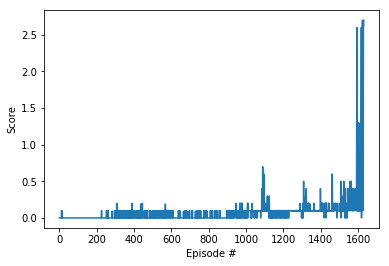

In [11]:
def tennis_MADDPG(n_episodes=4000, max_t=100000, print_every=10): 
    len_dequeue = 100
    scores_deque = deque(maxlen = len_dequeue)
    all_scores = []
    max_score_of_both_agents = []

    mean_scores = []
    
    best_players_score = 0.0
    test = False
    agent_player_1.reset()
    agent_player_2.reset()
   
    add_noise = False
    # Define shared Replay-Buffer
    # Replay memory
    shared_ReplayBuffer = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, 24)
    
    
    for i_episode in range(1, n_episodes+1):
        # env_info = env.reset(train_mode=True)[brain_name]   # reset the environment    
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment  
        actions = np.zeros((2,2))
        
        #print("1- action:type, shape, actions", type(actions), actions.shape, actions)
        
        # states = env_info.vector_observations 
        states = env_info.vector_observations                    # get the current state (for each agent)
        
        scores_for_one_episode_two_agents = np.zeros(num_agents) # initialize the score (for each agent)
    
        # print("num_agents", num_agents)
        # print("scores_for_one_episode_two_agentss", scores_for_one_episode_two_agents)
        
        for t in range(max_t):
            # actions = agent.act(states)
            actions = np.random.randn(num_agents, action_size)
            actions[0] = agent_player_1.act(states[0], add_noise) 
            actions[1] = agent_player_2.act(states[1], add_noise)
            
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            
            next_states = env_info.vector_observations         # get next state (for each agent) 
            rewards = env_info.rewards                         # get reward (for each agent)
                                                                                        
            dones = env_info.local_done
            time_step = t
            # both players uses the Replay-Buffer (each is a copy of the other) with experience of both players
            # print("2- action:type, shape, actions", type(actions), actions.shape, actions)
            
            agent_player_1.step(states[0], actions[0], actions[1], rewards[0], next_states[0], dones[0], shared_ReplayBuffer,  time_step)
            agent_player_2.step(states[1], actions[1], actions[0], rewards[1], next_states[1], dones[1], shared_ReplayBuffer,  time_step)
        
            
            scores_for_one_episode_two_agents += rewards    # update the score from one Episode for each agent.
           
            if (np.max(rewards) > 0):
                print("--Ball returned at episode: {},\ttimesteps: {},\tsum of episode-score for Player_1/Player_2: [{:.3f}][{:.3f}]".format(i_episode, t, 
                                            scores_for_one_episode_two_agents[0], scores_for_one_episode_two_agents[1]))
            #print("timestep, reward_PerTimestep, added scoreEpisode, dones", t, rewards, scores_for_one_episode_two_agents, dones)
            
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                #print("End of episode")
                # print("Episode-Ende/dones = True --> i_episod {} with: {} timesteps and rewards: {}".format(i_episode, t, rewards))
                break
            
        # kb: Best score of both players
        # Target --> see: Udacity: "The Envirement"
        # The task is episodic, and in order to solve the environment, 
        # your agents must get an average score of +0.5 (over 100 consecutive episodes, 
        # after taking the maximum over both agents). 
        # Specifically:
        # - After each episode, we add up the rewards that each agent received (without discounting), 
        #   to get a score for each agent. This yields 2 (potentially different) scores. 
        #   We then take the maximum of these 2 scores.
        # - This yields a single score for each episode.
        # The environment is considered solved, when the average (over 100 episodes) of those scores is at least +0.5.
        # Take the maximum of one Episode  of two agents and store it in list: scores_deque
        
        # First: Add all averages for gererate the output diagramm. 
        
        # Take the maximum of one Episode  of two agents and store it in list: max_score_of_both_agents
        # max_score_of_both_agents.append(np.max(scores_for_one_episode_two_agents))
       
        max_score_of_both_agents = scores_for_one_episode_two_agents.max()
        # scores_deque is list with 100 entries, with scores_deque i is possible to calculate the needed average. 
        
        scores_deque.append(max_score_of_both_agents)
        # Now calculate the average of best scores of the last 100 episodes --> scores_deque
        average_score_deque = np.mean(scores_deque)
    
        all_scores.append(max_score_of_both_agents) # Add best scores of each episode
        
        if test == True:
            print("\n max_score_of_both_agents", max_score_of_both_agents)
            
        
        if test == True:
            print("\n np.shape(max_score_of_both_agents, max_score_of_both_agents", np.shape(max_score_of_both_agents),max_score_of_both_agents)    
        
        if i_episode % print_every == 0:
            print('\rEpisode: {}\tscore_actual Episode: {:.3f}\tAverage Score of the last hundred Episodes: {:.3f}'.format(i_episode, max_score_of_both_agents, average_score_deque))
        
        # Gernerate weights with different score-results for later testing of the  agents behaviour
        if (average_score_deque <= 0.1):
            torch.save(agent_player_1.actor_local.state_dict(),  'score_01_player_1_checkpoint_actor.pth')
            torch.save(agent_player_1.critic_local.state_dict(), 'score_01_player_1_checkpoint_critic.pth')
            torch.save(agent_player_2.actor_local.state_dict(),  'score_01_player_2_checkpoint_actor.pth')
            torch.save(agent_player_2.critic_local.state_dict(), 'score_01_player_2_checkpoint_critic.pth')
        elif  (average_score_deque <= 0.3):
            torch.save(agent_player_1.actor_local.state_dict(),  'score_03_player_1_checkpoint_actor.pth')
            torch.save(agent_player_1.critic_local.state_dict(), 'score_03_player_1_checkpoint_critic.pth')
            torch.save(agent_player_2.actor_local.state_dict(),  'score_03_player_2_checkpoint_actor.pth')
            torch.save(agent_player_2.critic_local.state_dict(), 'score_03_player_2_checkpoint_critic.pth')    
        elif  (average_score_deque <= 0.5):
            torch.save(agent_player_1.actor_local.state_dict(),  'score_05_player_1_checkpoint_actor.pth')
            torch.save(agent_player_1.critic_local.state_dict(), 'score_05_player_1_checkpoint_critic.pth')
            torch.save(agent_player_2.actor_local.state_dict(),  'score_05_player_2_checkpoint_actor.pth')
            torch.save(agent_player_2.critic_local.state_dict(), 'score_05_player_2_checkpoint_critic.pth')
        else:    
            print("----- target reached with a mean score of the last 100 episodes of:  0.5 -------")
            break
    return all_scores

average_score_deque = tennis_MADDPG()
# print("all_scores", scores)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(average_score_deque)+1), average_score_deque)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### For Visualization of the playing agents see the Notebook "Tennis_Player.ipynb"
In the visualization of Tennis_Player-Notebook it is possible
to select individual Player-Levels.
This make it possible to study different Learning-States.